# Parte I


## 1. **¿Cómo identifica INDEC a las personas pobres?**

Para identificar a las personas pobres INDEC utiliza la metodología de la línea de pobreza o indigencia, comparando el ingreso total familiar de cada hogar con un conjunto de bienes y servicios. Define una canasta básica alimentaria, compuesta únicamente por alimentos capaces de satisfacer un umbral mínimo de necesidades energéticas y proteicas. Los hogares cuyos ingresos no logren alcanzar esa canasta mediante sus ingresos son considerados indigentes. La línea de pobreza se constituye con la canasta básica total (CBT), que eincluye otros bienes y servicios no alimentarios (vestimenta, transprte, educación, salud, etc.) Para obtener la CBT se utiliza el coeficiente de Engel, definido como la relación entre los gastos alimentarios y los gastos totales observados en la población de referencia. Y dado que las necesidades nutricionales difieren entre la población, se construye una unidad de referencia, "el adulto equivalente", para establecer luego las relaciones en las necesidades energéticas según edad y sexo de las personas. A partir de estas equivalencias se construyen las líneas de pobreza de cada hogar según su tamaño y composición. La caracterización entre pobres y no pobres se extiene a cada una de las personas que integran el hogar.

In [5]:
# Importamos OS para manipular rutas
import os

#Veo si la ruta es correcta
print(os.getcwd())

#Cambio a la ruta del curso
os.chdir("C:/Users/admin/Documents/Códigos Pytohn/UNIDAD 1")

#Chequeo que se haya cambiado.
print(os.getcwd())


C:\Users\admin\Documents\Códigos Pytohn\UNIDAD 1
C:\Users\admin\Documents\Códigos Pytohn\UNIDAD 1


In [184]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

---

### a. Selección de región y unión de bases de distintos años 

In [8]:
#Abrimos la EPH de individuos 2025

eph_individual_25= pd.read_excel("EPH_usu_1_Trim_2025_xls/EPH_usu_1er_Trim_2025_xlsx/usu_individual_T125.xlsx")


In [132]:
#Filtro por región las bases de 2025

eph_individual_patagonia_25 = eph_individual_25[eph_individual_25['REGION'] == 44]

In [24]:
#Abrimos la EPH de individuos 2005

eph_individual_05= pd.read_stata("t105_dta/Individual_t105.dta")


In [134]:
#Filtramos la región

eph_individual_patagonia_05 = eph_individual_05[eph_individual_05["region"]== "Patagónica"]

In [136]:
#Nos quedamos con variables de interés y renombramos para facilitar tratamiento en EPH 2025

eph_individual_patagonia_25 = eph_individual_patagonia_25[["ANO4","CODUSU", "NRO_HOGAR","CH04", "CH06", "CH07", "CH08", "NIVEL_ED", "ESTADO",
    "CAT_OCUP", "CAT_INAC","ITF", "IPCF", "PP07H", "PP03C", "P47T", "P21", "PP03G"]]

#Pasamos todo a minúscula para poder unir

eph_individual_patagonia_25.columns = eph_individual_patagonia_25.columns.str.lower()


In [144]:
#Nos quedamos con variables de interés y renombramos para facilitar tratamiento en EPH 2005

eph_individual_patagonia_05 = eph_individual_patagonia_05[["ano4","CODUSU", "nro_hogar","ch04", "ch06", "ch07", "ch08", "nivel_ed", "estado",
    "cat_ocup", "cat_inac","itf", "ipcf", "pp07h", "pp03c", "p47t", "p21", "pp03g"]]

#Pasamos todo a minúscula para poder unir

eph_individual_patagonia_05.columns = eph_individual_patagonia_05.columns.str.lower()

In [148]:
# Unir ambas bases

eph_individual_patagonia = pd.concat(
    [eph_individual_patagonia_05, eph_individual_patagonia_25])

eph_individual_patagonia.reset_index(drop=True) # index original es descartado

,ano4,codusu,nro_hogar,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_ocup,cat_inac,itf,ipcf,pp07h,pp03c,p47t,p21,pp03g
0,2005.0,125814,1.0,Varón,46.0,Casado,Obra social (incluye PAMI),Secundaria Incompleta,Ocupado,Obrero o empleado,0.0,2400.0,480.0,Sí,...un sólo empleo/ocupación/actividad?,2400.0,2400.0,No
1,2005.0,125814,1.0,Mujer,32.0,Casado,Obra social (incluye PAMI),Secundaria Incompleta,Inactivo,0.0,Ama de casa,2400.0,480.0,0.0,0.0,0.0,0.0,0.0
2,2005.0,125814,1.0,Varón,14.0,Soltero,Obra social (incluye PAMI),Primaria Completa,Inactivo,0.0,Estudiante,2400.0,480.0,0.0,0.0,0.0,0.0,0.0
3,2005.0,125814,1.0,Varón,9.0,Soltero,Obra social (incluye PAMI),Primaria Incompleta (incluye educación especial),Menor de 10 años,0.0,Estudiante,2400.0,480.0,0.0,0.0,0.0,0.0,0.0
4,2005.0,125814,1.0,Mujer,3.0,Soltero,Obra social (incluye PAMI),Sin instrucción,Menor de 10 años,0.0,Menor de 6 años,2400.0,480.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8583,2025.0,TQRMNORXVHMMKUCDEHGHJ00882475,1.0,2,55,1,3.0,4,3,0,4,350000.0,87500.0,NaN,NaN,0.0,0.0,NaN
8584,2025.0,TQRMNORXVHMMKUCDEHGHJ00882475,1.0,1,49,1,3.0,1,1,2,0,350000.0,87500.0,0.0,1.0,80000.0,80000.0,1.0
8585,2025.0,TQRMNORXVHMMKUCDEHGHJ00882475,1.0,1,35,5,3.0,1,3,0,6,350000.0,87500.0,NaN,NaN,120000.0,0.0,NaN
8586,2025.0,TQRMNORXVHMMKUCDEHGHJ00882475,1.0,2,26,5,3.0,3,1,3,0,350000.0,87500.0,2.0,1.0,150000.0,150000.0,2.0


---

### b. Corregir formato de variables y elaboración de heatmap 

Dado que ambas bases presentan diferencias en su formato —la correspondiente a 2005 contiene las categorías expresadas en texto, mientras que la de 2025 las representa mediante valores numéricos—, resulta necesario unificar los criterios de codificación. En consecuencia, se procedió a estandarizar las variables, transformando todas las categorías a formato textual con el fin de garantizar la coherencia y comparabilidad entre ambas fuentes de datos.

In [162]:
#Para que las columnas queden todas en el mismo formato

#CH04

def clasificar_sexo(sexo):
    if sexo == 1:
        return "Varón"
    elif sexo == 2:
        return "Mujer"
    else:
        return sexo

eph_individual_patagonia['ch04'] = eph_individual_patagonia['ch04'].apply(clasificar_sexo)

#CH07

def clasificar_estado_civil(estado):
    if estado == 1:
        return "Unido"
    elif estado == 2:
        return "Casado"
    elif estado == 3:
        return "Separado o divorciado"
    elif estado == 4:
        return "Viudo"
    elif estado == 5:
        return "Soltero"
    else:
        return estado

eph_individual_patagonia['ch07'] = eph_individual_patagonia['ch07'].apply(clasificar_estado_civil)

#CH08

def clasificar_cobertura_medica(cobertura):
    if cobertura == 1:
        return "Obra social (incluye PAMI)"
    elif cobertura == 2:
        return "Mutual/Prepaga/Servicio de emergencia"
    elif cobertura == 3:
        return "Planes y seguros públicos"
    elif cobertura == 4:
        return "No paga ni le descuentan"
    elif cobertura == 9:
        return "Ns./Nr."
    elif cobertura == 12:
        return "Obra social y mutual/prepaga/servicio de emergencia"
    elif cobertura == 13:
        return "Obra social y planes y seguros públicos"
    elif cobertura == 23:
        return "Mutual /prepaga/servicio de emergencia/planes y seguros públicos"
    elif cobertura == 123:
        return "Obra social, mutual/prepaga/servicio de emergencia y planes y seguros públicos"
    else:
        return cobertura

eph_individual_patagonia['ch08'] = eph_individual_patagonia['ch08'].apply(clasificar_cobertura_medica)


#Nivel_ed

def clasificar_nivel_ed(educacion):
    if educacion == 1:
        return "Primaria Incompleta (incluye educación especial)"
    elif educacion == 2:
        return "Primaria Completa"
    elif educacion == 3:
        return "Secundaria Incompleta"
    elif educacion == 4:
        return "Secundaria Completa"
    elif educacion == 5:
        return "Superior Universitaria Incompleta"
    elif educacion == 6:
        return "Superior Universitaria Completa"
    elif educacion == 7:
        return "Sin Instrucción"
    elif educacion == 9:
        return "Ns./Nr."
    else:
        return educacion

eph_individual_patagonia['nivel_ed'] = eph_individual_patagonia['nivel_ed'].apply(clasificar_nivel_ed)

#Estado

def clasificar_estado(estado):
    if estado == 0:
        return "Entrevista individual no realizada (no respuesta al cuestion"
    elif estado == 1:
        return "Ocupado"
    elif estado == 2:
        return "Desocupado"
    elif estado == 3:
        return "Inactivo"
    elif estado == 4:
        return "Menos de 10 años"
    else:
        return estado

eph_individual_patagonia['estado'] = eph_individual_patagonia['estado'].apply(clasificar_estado)


#CAT_OCUP

def clasificar_cat_ocup(cat_ocup):
    if cat_ocup == 1:
        return "Patrón"
    elif cat_ocup == 2:
        return "Cuenta propia"
    elif cat_ocup == 3:
        return "Obrero o empleado"
    elif cat_ocup == 4:
        return "Trabajador familiar sin remuneración"
    else:
        return cat_ocup

eph_individual_patagonia['cat_ocup'] = eph_individual_patagonia['cat_ocup'].apply(clasificar_cat_ocup)

#CAT_INAC

def clasificar_inactividad(cat_inac):
    if cat_inac == 1:
        return "Jubilado/pensionado"
    elif cat_inac == 2:
        return "Rentista"
    elif cat_inac == 3:
        return "Estudiante"
    elif cat_inac == 4:
        return "Ama de casa"
    elif cat_inac == 5:
        return "Menor de 6 años"
    elif cat_inac == 6:
        return "Discapacitado"
    elif cat_inac == 7:
        return "Otros"
    else:
        return cat_inac

eph_individual_patagonia['cat_inac'] = eph_individual_patagonia['cat_inac'].apply(clasificar_inactividad)

#PP07H

def clasificar_formalidad(formalidad):
    if formalidad == 1:
        return "Sí"
    elif formalidad == 2:
        return "No"
    else:
        return formalidad

eph_individual_patagonia['pp07h'] = eph_individual_patagonia['pp07h'].apply(clasificar_formalidad)


#PP03C

def clasificar_pluriempleo(pluriempleo):
    if pluriempleo == 1:
        return "...un sólo empleo/ocupación/actividad?"
    elif pluriempleo == 2:
        return "...más de un empleo/ocupación/actividad?"
    else:
        return pluriempleo

eph_individual_patagonia['pp03c'] = eph_individual_patagonia['pp03c'].apply(clasificar_pluriempleo)

#PP03G

def clasificar_subempleo(subempleo):
    if subempleo == 1:
        return "Sí"
    elif subempleo == 2:
        return "No"
    else:
        return subempleo

eph_individual_patagonia['pp03g'] = eph_individual_patagonia['pp03g'].apply(clasificar_subempleo)

In [182]:
#Chequeamos

eph_individual_patagonia.sample(10)

,ano4,codusu,nro_hogar,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_ocup,cat_inac,itf,ipcf,pp07h,pp03c,p47t,p21,pp03g
44152,2005.0,196335,1.0,Varón,5.0,Soltero,No paga ni le descuentan,Primaria Incompleta (incluye educación especial),Menor de 10 años,0.0,Menor de 6 años,575.0,1.916667e+02,0.0,0.0,0.0,0.0,0.0
11671,2025.0,TQRMNOSPTHJOKRCDEGNFJ00873174,1.0,Varón,52,Unido,Obra social (incluye PAMI),Secundaria Completa,Ocupado,Obrero o empleado,0,0.0,0.000000e+00,Sí,...un sólo empleo/ocupación/actividad?,800000.0,800000.0,No
44504,2005.0,261225,1.0,Varón,42.0,Casado,Obra social (incluye PAMI),Secundaria Incompleta,Ocupado,Obrero o empleado,0.0,1290.0,2.580000e+02,Sí,...un sólo empleo/ocupación/actividad?,1050.0,750.0,No
39056,2025.0,TQRMNOTPVHJNLMCDEHGHJ00874298,1.0,Mujer,59,Casado,Obra social (incluye PAMI),Secundaria Incompleta,Inactivo,0,Ama de casa,0.0,0.000000e+00,NaN,NaN,0.0,0.0,NaN
10567,2025.0,TQRMNORQVHJOLPCDEFPCH00873115,1.0,Varón,59,Soltero,Obra social (incluye PAMI),Primaria Completa,Inactivo,0,Ama de casa,944000.0,4.720000e+05,NaN,NaN,472000.0,0.0,NaN
46509,2005.0,190216,1.0,Mujer,5.0,Soltero,No paga ni le descuentan,Sin instrucción,Menor de 10 años,0.0,Menor de 6 años,2000.0,4.000000e+02,0.0,0.0,0.0,0.0,0.0
30411,2025.0,TQRMNOPRSHLMKOCDEOJAH00856262,1.0,Mujer,68,Unido,Obra social (incluye PAMI),Secundaria Completa,Inactivo,0,Rentista,1045000.0,5.225000e+05,NaN,NaN,610000.0,0.0,NaN
17655,2025.0,TQRMNORVPHMNLLCDEHGHJ00879700,1.0,Varón,13,Soltero,Obra social (incluye PAMI),Secundaria Incompleta,Inactivo,0,Estudiante,0.0,0.000000e+00,NaN,NaN,0.0,0.0,NaN
25606,2025.0,TQRMNOPVVHJMLNCDEHGHJ00880253,1.0,Mujer,60,Casado,Obra social (incluye PAMI),Primaria Incompleta (incluye educación especial),Inactivo,0,Ama de casa,1600000.0,8.000000e+05,NaN,NaN,0.0,0.0,NaN
10652,2025.0,TQRMNOPVYHKLKMCDEOHCH00860554,1.0,Mujer,9,Soltero,No paga ni le descuentan,Primaria Incompleta (incluye educación especial),Menos de 10 años,0,Estudiante,4000000.0,1.333333e+06,NaN,NaN,0.0,0.0,NaN


Dado que hay variables categóricas que alternan 0 y NAN para respuestas incorrectas o que no corresponden, unificamos todo a NAN.

In [190]:

# Lista de variables a modificar porque tienen un 0 en vez de NAN y son categoricas
variables = ['cat_ocup', 'cat_inac', 'pp07h', 'pp03c', 'pp03g']

# Reemplazar 0 por NaN en todo el DataFrame
eph_individual_patagonia[variables] = eph_individual_patagonia[variables].replace(0, np.nan)

In [192]:
#Chequeamos

eph_individual_patagonia.sample(10)

,ano4,codusu,nro_hogar,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_ocup,cat_inac,itf,ipcf,pp07h,pp03c,p47t,p21,pp03g
46750,2005.0,243296,1.0,Varón,50.0,Casado,Obra social (incluye PAMI),Secundaria Incompleta,Ocupado,Obrero o empleado,NaN,1195.0,5.975000e+02,Sí,...un sólo empleo/ocupación/actividad?,645.0,645.0,Sí
45728,2005.0,186796,1.0,Varón,27.0,Soltero,Obra social (incluye PAMI),Primaria Completa,Ocupado,Obrero o empleado,NaN,1580.0,1.316667e+02,Sí,...un sólo empleo/ocupación/actividad?,530.0,380.0,No
31979,2025.0,TQRMNORTWHKMKNCDEOHCH00861405,1.0,Varón,29,Soltero,Obra social (incluye PAMI),Secundaria Completa,Ocupado,Obrero o empleado,NaN,1000000.0,1.000000e+06,Sí,...un sólo empleo/ocupación/actividad?,1000000.0,1000000.0,No
23897,2025.0,TQRMNORTTHJOLQCDEOHCH00877474,1.0,Varón,37,Soltero,Obra social (incluye PAMI),Secundaria Completa,Ocupado,Obrero o empleado,NaN,4800000.0,1.200000e+06,Sí,...un sólo empleo/ocupación/actividad?,1800000.0,1200000.0,No
15028,2025.0,TQRMNORVSHKOKQCDEGNFJ00861595,1.0,Mujer,11,Soltero,No paga ni le descuentan,Primaria Incompleta (incluye educación especial),Inactivo,NaN,Estudiante,0.0,0.000000e+00,NaN,NaN,0.0,0.0,NaN
6283,2025.0,TQRMNOSWWHLMLQCDEGNFJ00853352,1.0,Varón,18,Soltero,No paga ni le descuentan,Superior Universitaria Incompleta,Inactivo,NaN,Estudiante,0.0,0.000000e+00,NaN,NaN,0.0,0.0,NaN
44936,2005.0,180152,1.0,Varón,36.0,Separado o divorciado,No paga ni le descuentan,Secundaria Completa,Ocupado,Obrero o empleado,NaN,350.0,7.000000e+01,No,...un sólo empleo/ocupación/actividad?,150.0,150.0,No
2272,2025.0,TQRMNORTVHKMKRCDEHGHJ00865899,1.0,Varón,51,Soltero,Obra social (incluye PAMI),Superior Universitaria Completa,Ocupado,Obrero o empleado,NaN,2400000.0,2.400000e+06,Sí,...más de un empleo/ocupación/actividad?,2400000.0,1200000.0,No
9333,2025.0,TQRMNOQSXHMOKOCDEOJAH00878800,1.0,Varón,26,Soltero,No paga ni le descuentan,Secundaria Completa,Ocupado,Cuenta propia,NaN,1400000.0,7.000000e+05,NaN,...un sólo empleo/ocupación/actividad?,700000.0,700000.0,No
9768,2025.0,TQRMNORUWHMNKQCDEOJAH00878768,1.0,Mujer,-1,Soltero,Obra social (incluye PAMI),Sin Instrucción,Menos de 10 años,NaN,Menor de 6 años,0.0,0.000000e+00,NaN,NaN,0.0,0.0,NaN


Reviso que todas las variables tengan formatos correctos.

In [209]:
print('\nTypes:\n', eph_individual_patagonia.dtypes)


Types:
 ano4         float64
codusu        object
nro_hogar    float64
ch04          object
ch06          object
ch07          object
ch08          object
nivel_ed      object
estado        object
cat_ocup      object
cat_inac      object
itf          float64
ipcf         float64
pp07h         object
pp03c         object
p47t         float64
p21          float64
pp03g         object
dtype: object


In [215]:
#Paso de objeto a categoría y vuelvo a chequear

cols_obj = eph_individual_patagonia.select_dtypes(include='object').columns
eph_individual_patagonia[cols_obj] = eph_individual_patagonia[cols_obj].astype('category')

print('\nTypes:\n', eph_individual_patagonia.dtypes)


Types:
 ano4          float64
codusu       category
nro_hogar     float64
ch04         category
ch06         category
ch07         category
ch08         category
nivel_ed     category
estado       category
cat_ocup     category
cat_inac     category
itf           float64
ipcf          float64
pp07h        category
pp03c        category
p47t          float64
p21           float64
pp03g        category
dtype: object


**Armo el heatmap**

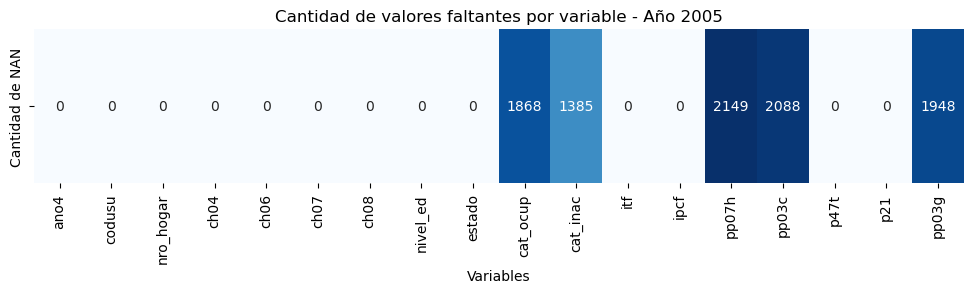

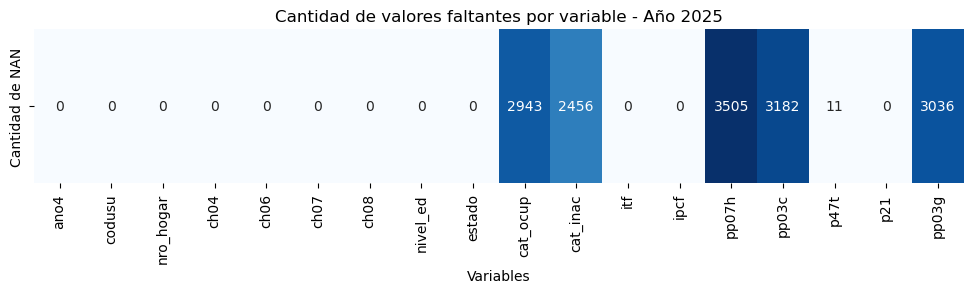

In [204]:
#Separo los años
anios = eph_individual_patagonia['ano4'].unique()

# Creo un heatmap para cada año
for año in anios:
    # Filtramos las filas del año correspondiente
    df_año = eph_individual_patagonia[eph_individual_patagonia['ano4'] == año]
    
    # Calculamos la cantidad de NaN por variable
    faltantes = df_año.isnull().sum().to_frame(name='Cantidad de NAN').T  # una fila, muchas columnas
    
    # Graficamos el heatmap
    plt.figure(figsize=(12, 2))
    sns.heatmap(faltantes, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Cantidad de valores faltantes por variable - Año {int(año)}')
    plt.xlabel('Variables')
    plt.ylabel('')
    plt.show()

Las variables con más faltantes son PP07H, PP03C, PP03G, CAT_OCUP y CAT_INAC. En todos los casos se da mas que nada en el año 2025, algo que es bastante lógico porque tiene más observaciones.

In [233]:
#Cantidad de observaciones
eph_individual_patagonia['ano4'].value_counts().sort_index()

ano4
2005.0    3229
2025.0    5359
Name: count, dtype: int64

### c. Corregir valores sin sentido 

In [235]:
eph_individual_patagonia.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Index: 8588 entries, 43801 to 45327
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ano4       8588 non-null   float64 
 1   codusu     8588 non-null   category
 2   nro_hogar  8588 non-null   float64 
 3   ch04       8588 non-null   category
 4   ch06       8588 non-null   category
 5   ch07       8588 non-null   category
 6   ch08       8588 non-null   category
 7   nivel_ed   8588 non-null   category
 8   estado     8588 non-null   category
 9   cat_ocup   3777 non-null   category
 10  cat_inac   4747 non-null   category
 11  itf        8588 non-null   float64 
 12  ipcf       8588 non-null   float64 
 13  pp07h      2934 non-null   category
 14  pp03c      3318 non-null   category
 15  p47t       8577 non-null   float64 
 16  p21        8588 non-null   float64 
 17  pp03g      3604 non-null   category
dtypes: category(12), float64(6)
memory usage: 671.9 KB


In [253]:
eph_individual_patagonia['p47t'].value_counts(dropna=False).sort_index()

p47t
-9.0            555
 0.0           3566
 12.0             1
 18.0             1
 20.0             1
               ... 
 6700000.0        1
 9000000.0        1
 14000000.0       1
 25000000.0       2
 NaN             11
Name: count, Length: 652, dtype: int64

In [262]:
eph_individual_patagonia['p21'].value_counts(dropna=False).sort_index()

p21
-9.0            377
 0.0           5051
 9.0              2
 30.0             1
 45.0             1
               ... 
 5500000.0        1
 6000000.0        1
 14000000.0       1
 20000000.0       1
 25000000.0       1
Name: count, Length: 315, dtype: int64

In [255]:
eph_individual_patagonia['itf'].value_counts(dropna=False).sort_index()

itf
0.0           1225
20.0             1
50.0             4
72.0             5
80.0             1
              ... 
10000000.0       4
11000000.0       2
14700000.0       2
26100000.0       2
26400000.0       4
Name: count, Length: 784, dtype: int64

In [257]:
eph_individual_patagonia['ipcf'].value_counts(dropna=False).sort_index()

ipcf
0.000000e+00    1225
1.440000e+01       5
1.666667e+01       3
1.875000e+01       8
2.000000e+01       1
                ... 
5.500000e+06       2
5.750000e+06       1
6.600000e+06       4
7.350000e+06       2
1.305000e+07       2
Name: count, Length: 1033, dtype: int64

El primer dato raro es el -9 en p47 y p21 que son el ingreso total y el de la ocupación principal de cada individuo.
Revisamos que formato de respuestas tiene:

In [260]:
eph_individual_patagonia[eph_individual_patagonia['p47t'] == -9]

,ano4,codusu,nro_hogar,ch04,ch06,ch07,ch08,nivel_ed,estado,cat_ocup,cat_inac,itf,ipcf,pp07h,pp03c,p47t,p21,pp03g
101,2025.0,TQRMNOQPYHLMKOCDEIHJF00854750,1.0,Mujer,38.0,Unido,Obra social (incluye PAMI),Secundaria Completa,Ocupado,Obrero o empleado,NaN,0.0,0.0,Sí,...un sólo empleo/ocupación/actividad?,-9.0,-9.0,No
420,2025.0,TQRMNOPYXHJOKMCDEOJAH00875900,1.0,Varón,37.0,Soltero,No paga ni le descuentan,Primaria Completa,Ocupado,Cuenta propia,NaN,0.0,0.0,NaN,...un sólo empleo/ocupación/actividad?,-9.0,-9.0,No
604,2025.0,TQRMNOTTTHMOKQCDEFPCH00877924,1.0,Varón,61.0,Casado,Obra social (incluye PAMI),Secundaria Incompleta,Inactivo,NaN,Jubilado/pensionado,0.0,0.0,NaN,NaN,-9.0,0.0,NaN
632,2025.0,TQRMNOTUSHMMKQCDEHGHJ00877609,1.0,Mujer,31.0,Soltero,Obra social (incluye PAMI),Secundaria Incompleta,Ocupado,Obrero o empleado,NaN,0.0,0.0,Sí,...un sólo empleo/ocupación/actividad?,-9.0,-9.0,No
668,2025.0,TQRMNOSPVHLKKMCDEFPCH00852458,1.0,Mujer,74.0,Viudo,Obra social (incluye PAMI),Secundaria Incompleta,Inactivo,NaN,Jubilado/pensionado,0.0,0.0,NaN,NaN,-9.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45113,2025.0,TQRMNOPSVHKMLNCDEGNFJ00858963,1.0,Varón,53.0,Unido,Obra social (incluye PAMI),Secundaria Completa,Ocupado,Obrero o empleado,NaN,0.0,0.0,Sí,...un sólo empleo/ocupación/actividad?,-9.0,-9.0,No
45130,2025.0,TQRMNOQPPHKMLLCDEFPCH00858632,1.0,Varón,44.0,Casado,Obra social (incluye PAMI),Superior Universitaria Completa,Ocupado,Obrero o empleado,NaN,0.0,0.0,Sí,...un sólo empleo/ocupación/actividad?,-9.0,-9.0,No
45159,2025.0,TQRMNOSSYHLMLPCDEGNFJ00853319,1.0,Varón,40.0,Soltero,Obra social (incluye PAMI),Secundaria Incompleta,Ocupado,Obrero o empleado,NaN,0.0,0.0,Sí,...un sólo empleo/ocupación/actividad?,-9.0,-9.0,No
45252,2025.0,TQRMNOTPXHJOKTCDEHGHJ00874517,1.0,Mujer,54.0,Soltero,Obra social (incluye PAMI),Superior Universitaria Completa,Inactivo,NaN,Jubilado/pensionado,0.0,0.0,NaN,NaN,-9.0,0.0,NaN


No se ve nada raro, así que se eliminan, ya que lo más probable es que sean no respuestas.

In [269]:
eph_individual_patagonia = eph_individual_patagonia[(eph_individual_patagonia['p47t'] != -9) & (eph_individual_patagonia['p21'] != -9)]

Lo mismo sucede con el 0 en ITF, ya que es raro que una familia tenga ingresos 0 de todos sus integrantes. Puede ser no respuesta o falta de información brindada

In [284]:
eph_individual_patagonia = eph_individual_patagonia[(eph_individual_patagonia['itf'] == 0)]

Los NAN en las variables categóricas responden a gente que no trabaja, por lo que no se eliminan, salvo que se decida trabajar únicamente con el universo de trabajadores.

---

# Parte II

C:\Users\admin\AppData\Local\Temp\ipykernel_28580\864707508.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_sexo = (eph_individual_patagonia.groupby(['ano4', 'ch04']).size().reset_index(name='cantidad'))


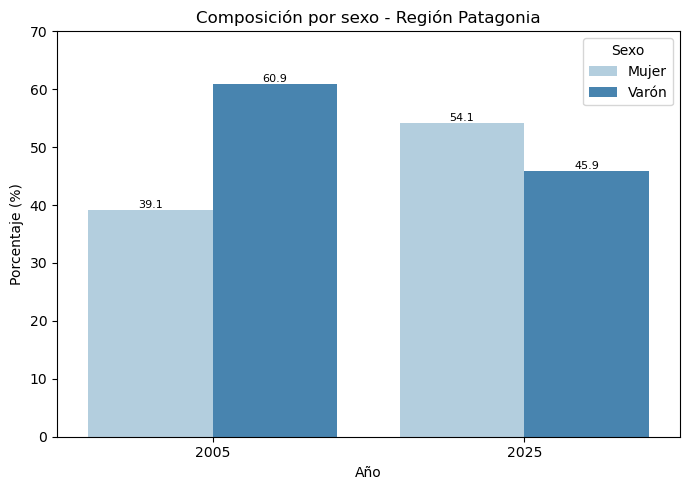

In [336]:
# Contar observaciones por sexo y año

conteo_sexo = (eph_individual_patagonia.groupby(['ano4', 'ch04']).size().reset_index(name='cantidad'))

# Calcular proporciones (%) dentro de cada año
conteo_sexo['proporcion'] = (conteo_sexo.groupby('ano4')['cantidad'].transform(lambda x: x / x.sum() * 100))

# Graficar proporciones en un mismo gráfico
plt.figure(figsize=(7,5))
conteo_sexo['ano4'] = conteo_sexo['ano4'].astype(int)
sns.barplot(data=conteo_sexo, x='ano4', y='proporcion', hue='ch04', palette='Blues')

plt.title('Composición por sexo - Región Patagonia')
plt.xlabel('Año')
plt.ylabel('Porcentaje (%)')
plt.ylim(0, 70)
plt.legend(title='Sexo', loc='upper right')

# Agregar etiquetas de porcentaje sobre las barras
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.1f', label_type='edge', fontsize=8)

plt.tight_layout()
plt.show()

Cambió la composición de la encuesta. Antes relevababa más hombres, ahora más mujeres.

## 1. Gráfico de barras de composición por sexo por año